# Dvojný integrál

> Co zde najdete. V úvodu je vysvětleno, jak vypadá teplotní pole při vedení tepla v mezikruží (nebo například ve válcové izolaci trubek s horkou vodou). Nám tato situace nebude vyhovovat a budeme se snažit dodáním zdrojů tepla dosáhnout toho, aby teplota klesala námi předepsaným způsobem. Difuzní rovnice nám pomůže určit, jak silný zdroj je nutné dát do jednotlivých míst. Potom budeme hledat celkový výkon zdrojů. Protože v každém místě bude jinak výkonný zdroj, není možné použít klasický součet (resp. násobení výkonu na plochu celkocou plochou), ale součet budeme muset realizovat integrálem. Výsledek poté zkontrolujeme celkovou bilancí toku na okrajích mezikruží. Tím si ukážeme si využití dvojného integrálu a současně cestu k bilanci sledující změnu množství stavové veličiny v konečně velkém objemu, tj. cestu k formulaci fyzikálních zákonů spojených s difuzní rovnicí v globálním tvaru.


## Prerekvizita - Tok tepla v kruhové desce

Budeme uvažovat desku ve tvaru mezikruží. Vnitřní kružnice má poloměr roven jedné, vnější roven čtyřem. Vnitřní mezikruží udržujeme na teplotě 100 stupňů Celsia a okraj na teplotě 0 stupňů Celsia. Pokud nejsou v desce zdroje tepla, potom každým kruhem o poloměru $r$ prochází stejný tok $Q$. Hustota $\vec q$ toku ve vzdálenosti $r$ od počátku je poté díky symetrii dána směrem od středu velikostí $$\vec q =\frac{Q}{2\pi r}.$$ To znamená, že tok je nepřímo úměrný vzdálenosti. Pro rozložení teploty $T(r)$ platí $$\frac{\mathrm dT}{\mathrm dr}=-k \frac 1r$$ a po integraci vidíme, že teplota klesá logaritmicky. 
$$T(r) = T(1)+ \int_1^r -k\frac 1r\mathrm dr = 100-k \ln r.$$ Konstantu $k$ určíme z podmínky $T(4)=0$ což dává 
$$T(r)=100-\frac {100}{\ln 4}\ln r.$$ Teplotní profil vypadá následovně.

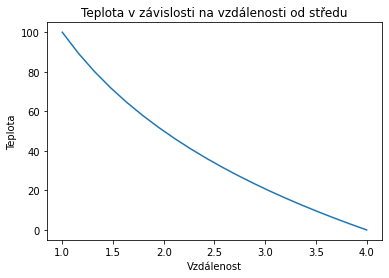

In [1]:
import numpy                     # knihovna na numerické výpočty (goniomerické funkce, gradient, 2D mřížka a dělení intervalu, ...)
import scipy.integrate           # knihovna na technické výpočty (integrál)
import matplotlib.pyplot as plt  # knihovna na kreslení
r = numpy.linspace (1,4,20)
plt.plot(r,100-100/numpy.log(4)*numpy.log(r))
plt.title("Teplota v závislosti na vzdálenosti od středu")
plt.xlabel("Vzdálenost")
plt.ylabel("Teplota")
None

Vidíme, že křivka udávající teplotu jako funkci vzdálenosti od středu je prohnutá. Toto prohnutí je způsobeno geometrií úlohy a předpokládejme, že nám nevyhovuje. Dalo by se změnit?

## Definice problému

Konečně máme dělostřeleckou přípravu na vysvětlení toho, o co se budeme snažit. Úkol je následující: **Podařilo by se teplotní profil v mezikruží narovnat? Aby teplota klesala rovnoměrně se vzdáleností od středu?** Pokusíme se o to.

* Pokusíme se do desky přidat zdroje tak šikovně, aby teplota klesala lineárně, nikoliv logaritmicky. 
* Výkonnost zdrojů v každém místě najdeme pomocí difuzní rovnice. Tedy z divergence toku. To najdeme Fourierovým zákonem, tedy z gradientu teploty.
* Výkon zdrojů v daném místě desky by nemusel být stejný. A pravěpodobně nebude. Bude tedy nutné posečítat příspěvky k celkovému výkonu zdrojů. To provedeme intergrací přes celé mezikruží.
* Výsledek porovnáme s tím, že výkon zdrojů musí vyrovnat nerovnost mezi toky na hranicích množiny .

## Teplotní pole s lineárním poklesem od středu

Pokud teplota klesá rovnoměrně se vzdáleností od počátku, je dána vztahem $$T(r)=(4-r)\frac {100}3.$$
Tj. v kartézských souřadnicích $$T(x,y)=\left(4-\sqrt{x^2+y^2}\right)\frac {100}3.$$ Abychom mohli situaci studovat na čtvercové množině, předefinujeme navíc funkci tak, aby vně mezikruží byla konstantní. Tedy teplota je dána následovně.
$$T(x,y)=\begin{cases}100 & x^2+y^2 \leq 1 \cr \left(4-\sqrt{x^2+y^2}\right)\frac {100}3 & 1\leq x^2+y^2\leq 4\cr 0 & \text{jinak}.\end{cases}$$

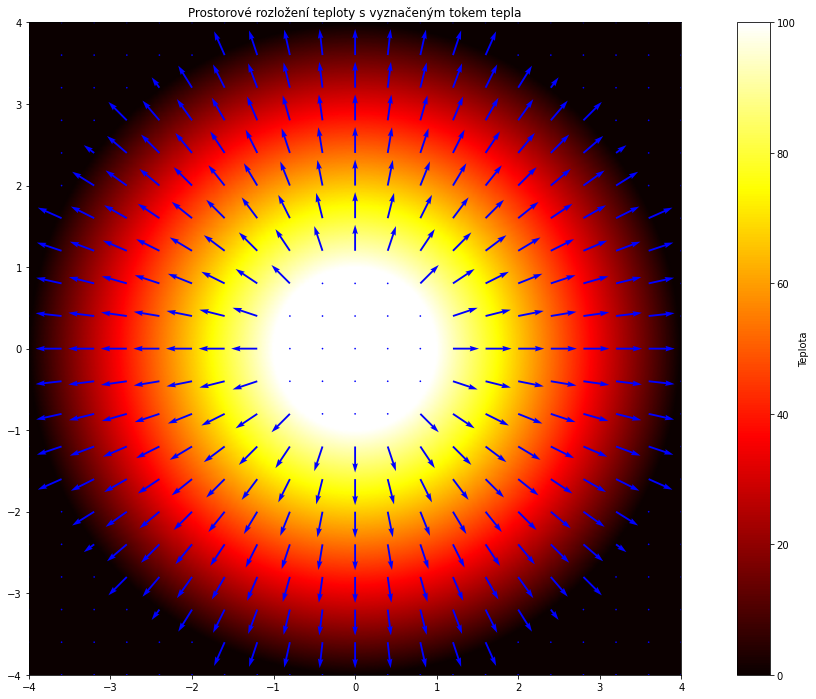

In [2]:
def teplota (x,y):               # teplota 100 stupňů na kružnici o poloměru 1, 0 stupňů na kružnici o poloměru 4 
                                 # a lineárně klesající se vzdáleností od počátku
  return (4-numpy.sqrt(x**2+y**2))*100/3

xmin, xmax, steps = -4, 4, 500   # interval pro krelsení a počet dělících bodů (hustota mřížky)
krok = (xmax-xmin)/steps         # délka kroku
y, x = numpy.mgrid[xmin:xmax:(steps+1)*1j, xmin:xmax:(steps+1)*1j]  # mrizka pro kresleni barevne mapy funkce dvou promennych
z = numpy.clip(teplota(x, y),0,100)           # mimo mezikruží teplotu ořežeme na hodnotu na okraji mezikruží
grady, gradx = numpy.gradient(z, krok)        # gradient teploty
tokx, toky = -gradx, -grady                   # tok tepla, jednotkový součinitel tepelné vodivosti

fig, ax = plt.subplots(1,1, figsize=(20,12))  # inicializace grafiky

## Vykreslení teploty a toku tepla
cmap = plt.get_cmap('hot')                     # nastaveni schema pro barevnou mapu
output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, label="Teplota")          # barevný sloupec s hodnotami vedle grafu
plt.quiver(x[::25,::25], y[::25,::25], tokx[::25,::25], toky[::25,::25], color='blue')   
                             # vykreslení toku a na dvacetpětkrát hrubší mřížce, než na které probíhají výpočty
ax.set_aspect(1)             # stejné měřítko na osách, aby se kružnice nedeformovaly
plt.title("Prostorové rozložení teploty s vyznačeným tokem tepla")
None

Pokusili jsme se zajistit rovnoměrný pokles teploty. Můžeme si to ověřit graficky na řezu středem.

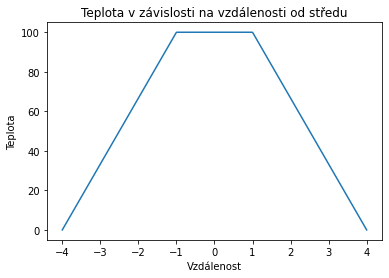

In [3]:
plt.plot(x[round(steps*0.5)],z[round(steps*0.5)])
plt.title("Teplota v závislosti na vzdálenosti od středu")
plt.xlabel("Vzdálenost")
plt.ylabel("Teplota")
None

Můžeme zkontrolovat velikost gradientu, jestli je všude stejná. Nakreslíme 2D graf pro normu gradientu (což je při jednotkovém součinitelu tepelné vodivosti současně i norma toku). Měli bychom na mezikruží vidět všude stejnou barvu. V místech, kde je teplota konstnatní (mimo mezikruží) budou gradient i jeho norma nulové. Gradient vidíme výše a normu gradientu si nakreslíme samostatně. Měla by být nulová vně a konstantní uvnitř. Hodnota uvnitř by měla být $\frac {100}{3}$, protože teplotní rozdíl 100 stupňů odpovídá třem jednotkám délky.

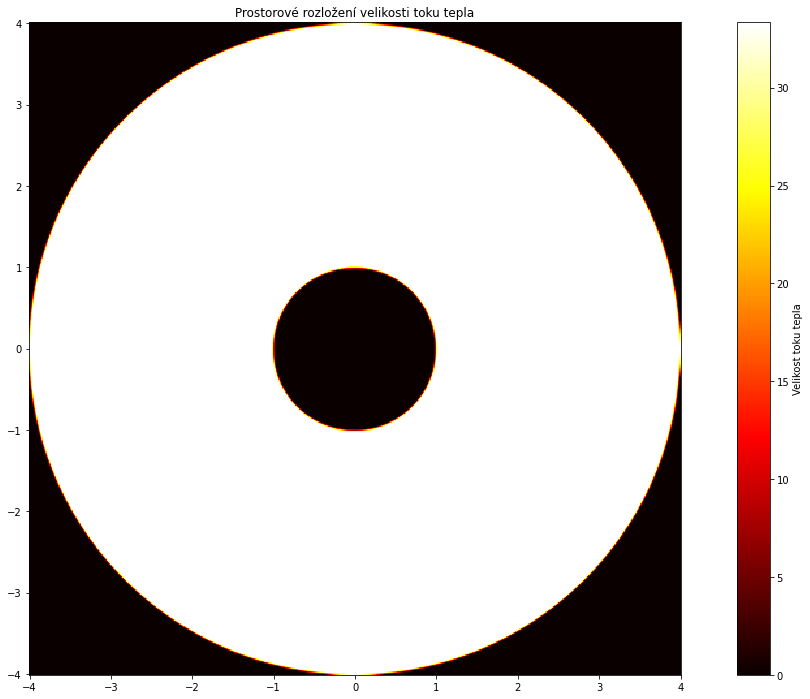

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20,12))  # inicializace grafiky
cmap = plt.get_cmap('hot')                    # nastaveni schema pro barevnou mapu
grad_norm = numpy.sqrt(tokx**2+toky**2)
output = plt.pcolormesh(x, y, grad_norm,
                        cmap=cmap, 
                        shading='auto') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, label="Velikost toku tepla") # barevný sloupec s hodnotami vedle grafu
ax.set_aspect(1) 
plt.title("Prostorové rozložení velikosti toku tepla")
None

## Divergence toku tepla ve vytvořeném teplotním poli

Tok je $\vec q = -\nabla T$ (budeme uvažovat jednotkový součinitel tepelné vodivosti).
Divergence toku je poté dána druhými derivacemi
$$
\nabla \cdot (-\nabla T) = 
-\frac{\partial ^2 T}{\partial x^2} - \frac{\partial ^2 T}{\partial y^2}.
$$
Pomocí konečných diferencí máme  
$$ \frac{\partial^2 T}{\partial x^2}\approx \frac{T(x-h,y)-2T(x,y)+T(x+h,y)}{h^2} $$
a
$$ \frac{\partial^2 T}{\partial y^2}\approx  \frac{T(x,y-h)-2T(x,y)+T(x,y+h)}{h^2}. $$
Odsud dostáváme numerický odhad pro divergenci toku ve tvaru
$$\nabla \vec q = 
\nabla \cdot (-\nabla T) \approx -\frac{T(x-h,y)+T(x+h,y)+ T(x,y-h)+T(x,y+h)-4T(x,y)}{h^2}.
$$


In [5]:
def divergence_toku (z, krok):
    output = numpy.zeros(z.shape)          # pole stejne dimenze jako pole z, ale slozene z nul
    for i in range (1,z.shape[0]-1):       # dvojitý cyklus přes všechny vnitřní body desky
        for j in range (1,z.shape[1]-1):
            output[i,j] = - (z[i-1,j]+z[i+1,j]+z[i,j-1]+z[i,j+1]- 4* z[i,j] ) / krok**2  # odhad pomocí konečných diferencí
    return(output)
divergence = divergence_toku(z, krok)      # výpočet divergence toku

Grafická kontrola odhaluje problém v místech, kde napojujeme měnící se teplotní profil konstantní teplotou. Je tam obrovské zakolísání vyvolané náhradou spojité funkce funkcí vyčíslenou na koenčně velké mřížce a náhradou derivací konečnými diferencemi.

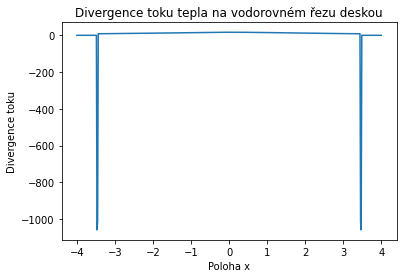

In [6]:
plt.plot(x[round(steps/4),:],divergence[:,round(steps/4)])
plt.title("Divergence toku tepla na vodorovném řezu deskou")
plt.xlabel("Poloha x")
plt.ylabel("Divergence toku")
None

V divergenci musíme odfiltrovat nežádoucí výkyvy, které vznikly napojením funkce dané analytickým předpisem na mezkruží a konstantní funkce mimo mezikruží. Konstanty použité pro toto ořezání byly stanoveny experimentálně z 2D obrázku, který následuje níže. Je samozřejmě možné použít vhodný automatický filtr, chceme však rychle postupovat k výpočtu dvojného integrálu a proto použijeme metodu experimentálně stanovených mezí. 

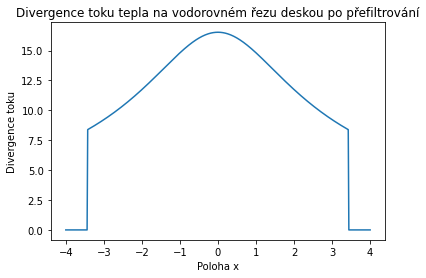

In [7]:
for i in range (1,divergence.shape[0]-1):                 # Dvojí cyklus přes všechny body mřížky
    for j in range (1,divergence.shape[1]-1):
        if abs(divergence[i,j])>60 or divergence[i,j]<0:  # Oprava výkyvů ořezáním hodnot vzniklých diskretizací
            divergence[i,j]=0
plt.plot(x[-round(steps/4),:],divergence[:,-round(steps/4)])
plt.title("Divergence toku tepla na vodorovném řezu deskou po přefiltrování")
plt.xlabel("Poloha x")
plt.ylabel("Divergence toku")
None            

Data jsou vyčištěna a můžeme pokračovat ve výpočtech. Vykreslíme prostové rozložení divergence, tj. veličinu udávající, jak intenzivně v daném místě narůstá tok.

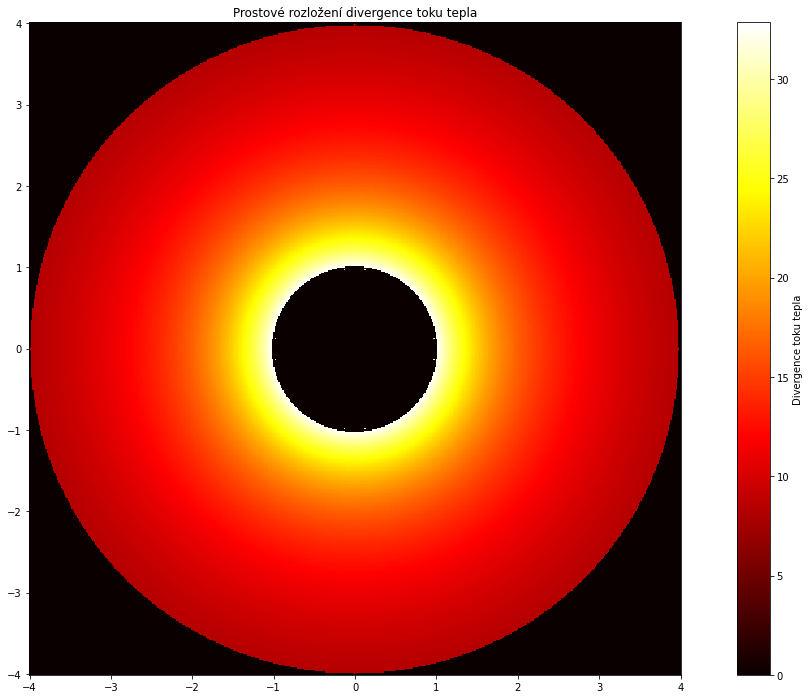

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20,12))  # inicializace grafiky
cmap = plt.get_cmap('hot')                    # nastaveni schema pro barevnou mapu
output = plt.pcolormesh(x, y, divergence ,
                        cmap=cmap, 
                        shading='auto')       # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, label="Divergence toku tepla")   # barevný sloupec s hodnotami vedle grafu
ax.set_aspect(1)
plt.title("Prostové rozložení divergence toku tepla")
None

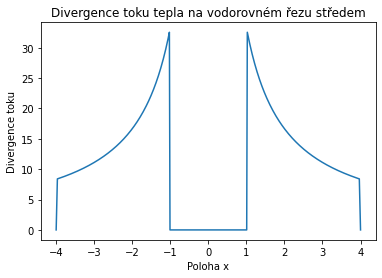

In [9]:
plt.plot(x[-round(steps/2),:],divergence[:,-round(steps/2)])
plt.title("Divergence toku tepla na vodorovném řezu středem")
plt.xlabel("Poloha x")
plt.ylabel("Divergence toku")
None 

Po vykreslení vidíme, jak rychle se daném místě mění tok. Difuzní rovnice níže nám tuto veličinu dá do souvislosti s výkonem zdrojů.

## Celkový výkon zdrojů tepla v desce


Dodáním zdrojů tepla do stacionární rovnice vedení tepla dostáváme
$$ 0 = \sigma - \nabla \cdot(-\nabla T)$$
a po osamostatnění zdrojů
$$ \sigma = \nabla \cdot(-\nabla T).$$
Divergence toku tedy udává, jaký je v daném místě zdroj, aby se udržel stávající stav lineárního poklesu teploty směrem od středu. To je pochopitelné i kvalitativní úvahou, kdy víme, že pro udržení stacionárního stavu se navýšení toku musí odněkud vzít - ze zdrojů. Přesněji, divergence udává hustotu zdrojů. Z obrázku s toutodivergencí vidíme, že výkon zdrojů se liší v závislosti na vzdálenosti od počátku. U středu je nutné mít výkonnější zdroje a jejich výkon musí směrem od středu klesat přesně předepsaným způsobem. Tento způsob vidíme na obrázku "Divergence toku tepla na vodorovném řezu středem". Analytické řešení ukazuje, že výkon zdrojů je nepřímo úměrný vzdálenosti od počátku. Celkový výkon zdrojů dostaneme integrálem. Dvojný integrál vypočteme převodem na dvojnásobný použitím Fubiniovy věty. 

In [13]:
interval = numpy.linspace (xmin, xmax, steps+1)   # definice intervalu pro integrování
              # výpočet vnitřních integrálů z Fubiniovy integrací přes druhou proměnnou
F = [scipy.integrate.simps(divergence[i,:], interval) for i in range(len(divergence))]
scipy.integrate.simps(F, interval)                # výpočet vnějšího integrálu

622.0449029709204

Celkový výkon zdrojů je 622. 

## Kontrola výsledku posouzením rozdílu mezi toky na hranici


Vyšlo to jak mělo? Zvolili jsme jednoduchý příklad, proto je možné se k dané hodnotě dobrat i ručně. Dokonce mnohem jednodušeji.

* Velikost gradientu toku je $\frac{100}3$, protože teplota klesne o sto stupňů na třech jednotkách délky
* Tok je v každém bodě kolmý na kružnice se středem v počátku a proto tok křivkou dostaneme jako součin velikosti toku a délky křivky.
* Celkový tok vnitřním mezikružím o poloměru $r=1$ je $$ \frac{100}3 2\pi.$$
* Celkový tok vnějším mezikružím o poloměru $r=4$ je $$ \frac{100}3 8\pi.$$
* Rozdíl mezi toky je $$\frac{100}3 8\pi - \frac{100}3 2\pi = \frac{600}3 \pi = 200\pi \approx 628.$$ Tento tok přibyl uvnitř mezikruží a dodaly jej externí zdroje.
* Oba výsledky, až na drobné odchylky, které je možno připsat na vrub aproximacím a nepřenostem z numerického výpočtu, jsou stejné.

## Závěr

* Ukázali jsme, že dvojným integrálem dokážeme posčítat příspěvky k celkové hodnotě v případě, že příspěvky jsou spojtě rozloženy v části dvourozměrné množiny. 
* Zvolili jsme jednoduchý příklad, kdy se můžeme k vyjadřované veličině dopočítat ještě jiným způsobem, abychom si ověřili, že výpočet je v pořádku.
